# Model 2: Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_percentage_error

In [34]:
X = final_cleaned1.drop(columns=["Streams"])
y = pd.DataFrame(final_cleaned1["Streams"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
X_train.shape

(1212, 25)

In [36]:
#Function to evaluate accuracy of model based on MAPE

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100-mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [37]:
#Initial fitting of the base model with basic hyperparameters, and acquiring its accuracy and average error.

base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(base_model, X_test, y_test.values.ravel())

y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

Model Performance
Average Error: 572247.2138
Accuracy = 91.74%.


In [38]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [10,20,30,40,50,60],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100]
}

# Instantiate the grid search model

grid_search = GridSearchCV(base_model, param_grid, n_jobs = -1,scoring = 'neg_mean_absolute_percentage_error')

In [39]:
# Fit the grid search to the data and attain the best hyperparameters for the tuning, and also indicating improvement

grid_search.fit(X_train, y_train.values.ravel())
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test.values.ravel())
print(grid_search.best_params_)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 553965.3131
Accuracy = 92.08%.
{'max_depth': 20, 'n_estimators': 70}
Improvement of 0.37%.


In [40]:
y_train_pred1 = best_grid.predict(X_train)
y_test_pred1 = best_grid.predict(X_test)

In [41]:
# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Base Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", base_model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred)*100))
print()

#Prediction Accuracy of Base Model
MSE_predicted = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Base Model \tTest Dataset")
print("Explained Variance (R^2) \t:", base_model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred)*100))
print()


# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred1)
print("Goodness of Fit of Tuned Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", best_grid.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred1)*100))
print()

#Prediction Accuracy of Model
MSE_predicted = mean_squared_error(y_test, y_test_pred1)
print("Goodness of Fit of Tuned Model \tTest Dataset")
print("Explained Variance (R^2) \t:", best_grid.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred1)*100))
print()


Goodness of Fit of Base Model 	Train Dataset
Explained Variance (R^2) 	: 0.9740141718295839
Mean Squared Error (MSE) 	: 314219003682.171
Root Mean Squared Error (RMSE) 	: 560552.4093982391
Mean Absolute Percentage error (MAPE) 	: 3.74%

Goodness of Fit of Base Model 	Test Dataset
Explained Variance (R^2) 	: 0.8174158890275129
Mean Squared Error (MSE) 	: 1403058786858.7
Root Mean Squared Error (RMSE) 	: 1184507.824735109
Mean Absolute Percentage error (MAPE) 	: 8.26%

Goodness of Fit of Tuned Model 	Train Dataset
Explained Variance (R^2) 	: 0.980969627643349
Mean Squared Error (MSE) 	: 230114068421.92776
Root Mean Squared Error (RMSE) 	: 479702.062140583
Mean Absolute Percentage error (MAPE) 	: 3.49%

Goodness of Fit of Tuned Model 	Test Dataset
Explained Variance (R^2) 	: 0.8276894970473078
Mean Squared Error (MSE) 	: 1324111741969.963
Root Mean Squared Error (RMSE) 	: 1150700.5440035053
Mean Absolute Percentage error (MAPE) 	: 7.92%



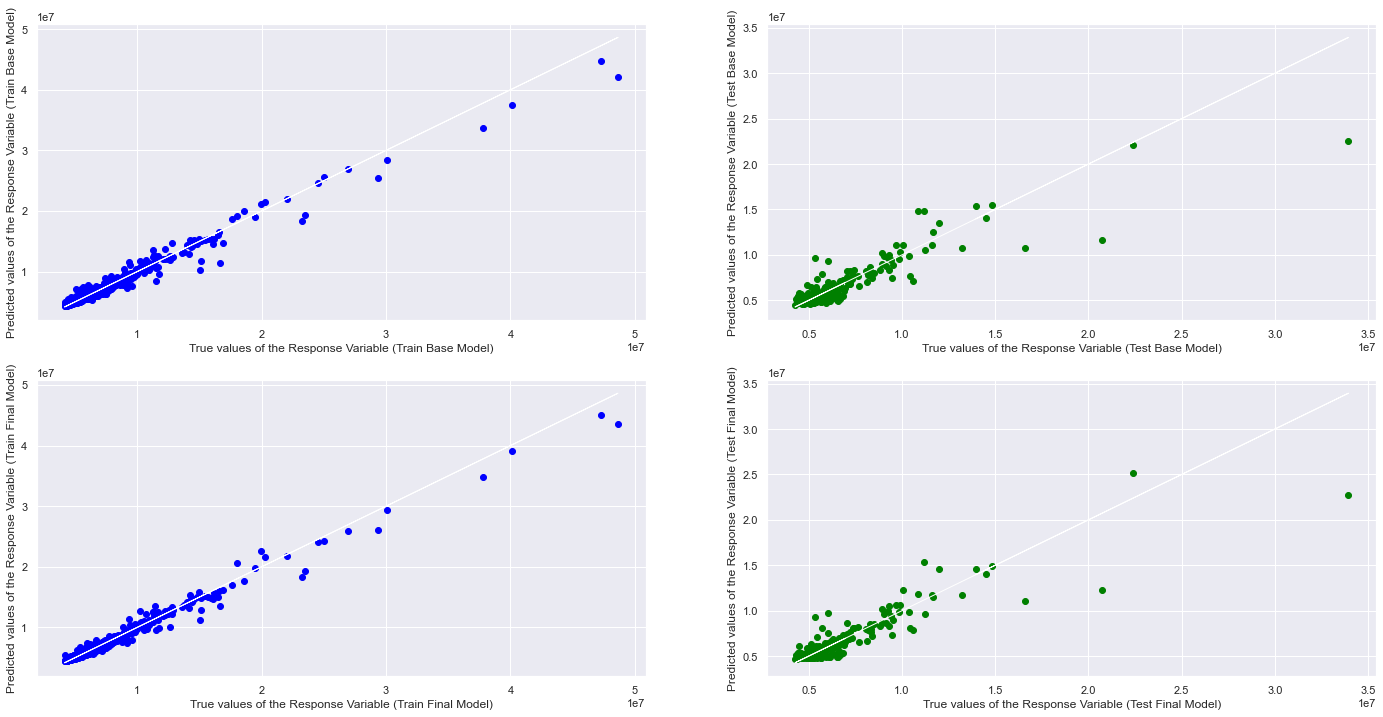

In [42]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0,0].scatter(y_train, y_train_pred, color = "blue")
axes[0,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0,0].set_xlabel("True values of the Response Variable (Train Base Model)")
axes[0,0].set_ylabel("Predicted values of the Response Variable (Train Base Model)")
axes[0,1].scatter(y_test, y_test_pred, color = "green")
axes[0,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[0,1].set_xlabel("True values of the Response Variable (Test Base Model)")
axes[0,1].set_ylabel("Predicted values of the Response Variable (Test Base Model)")
axes[1,0].scatter(y_train, y_train_pred1, color = "blue")
axes[1,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[1,0].set_xlabel("True values of the Response Variable (Train Final Model)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Train Final Model)")
axes[1,1].scatter(y_test, y_test_pred1, color = "green")
axes[1,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1,1].set_xlabel("True values of the Response Variable (Test Final Model)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Test Final Model)")
plt.show()

By looking at the true vs predicted graph, the data points are now much better fitted to the model, with the model being able to accurately predict the actual y values at a much better rate than the linear model before. This  clear improvement can also be seen from its base model alone. Hence, we conclude that a randomforestregressor is undoubtedly better than the linear model.